<a href="https://colab.research.google.com/github/rahul-727/ML/blob/main/2348544_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('/content/employee_data (1) 2.csv')
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(14249, 10)

In [5]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [6]:
df.nunique()

avg_monthly_hrs        249
department              12
filed_complaint          1
last_evaluation      12359
n_projects               7
recently_promoted        1
salary                   3
satisfaction         13710
status                   2
tenure                   8
dtype: int64

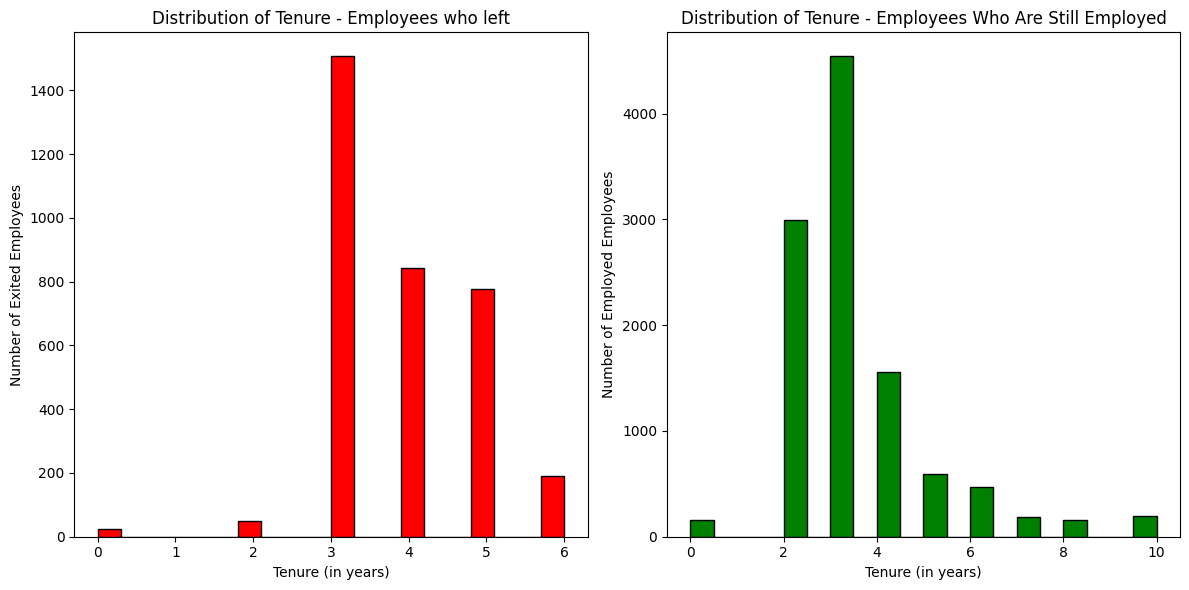

In [7]:
#visualize using histogram for employee tenure
df['tenure'] = df['tenure'].replace('NA', np.nan).fillna(0)
df['tenure'] = df['tenure'].astype(int)
left_employees = df[df['status']=='Left']
employed_employees = df[df['status']=='Employed']

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.hist(left_employees['tenure'],bins=20,color='red',edgecolor='black')
plt.xlabel('Tenure (in years)')
plt.ylabel('Number of Exited Employees')
plt.title('Distribution of Tenure - Employees who left')

plt.subplot(1, 2, 2)
plt.hist(employed_employees['tenure'], bins=20, color='green', edgecolor='black')
plt.xlabel('Tenure (in years)')
plt.ylabel('Number of Employed Employees')
plt.title('Distribution of Tenure - Employees Who Are Still Employed')

plt.tight_layout()
plt.show()

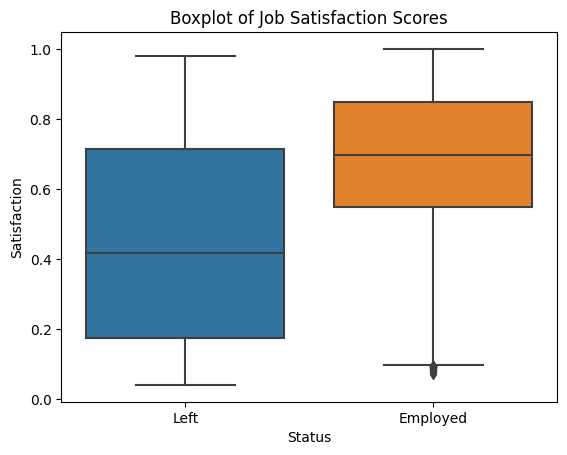

In [8]:
satisfaction = df["satisfaction"]
status = df["status"]
sns.boxplot(x="status", y="satisfaction", data=df)
plt.xlabel("Status") # Add x-axis label
plt.ylabel("Satisfaction") # Add y-axis label
plt.title("Boxplot of Job Satisfaction Scores") # Add title
plt.show() # Show the plot

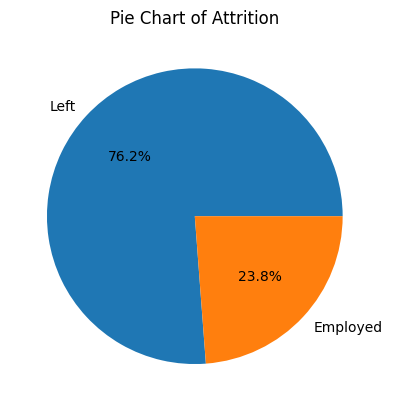

In [9]:
status = df["status"]

# Plot the pie chart
plt.pie(status.value_counts(), labels=status.unique(), autopct='%1.1f%%')
plt.title("Pie Chart of Attrition")
plt.show()


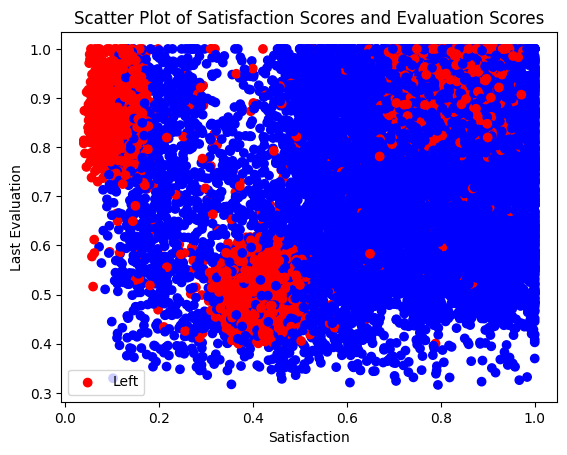

In [10]:
plt.scatter(df["satisfaction"], df["last_evaluation"], c=df["status"].map({"Left": "red", "Employed": "blue"}))
plt.xlabel("Satisfaction") # Add x-axis label
plt.ylabel("Last Evaluation") # Add y-axis label
plt.title("Scatter Plot of Satisfaction Scores and Evaluation Scores") # Add title
plt.legend(["Left", "Employed"]) # Add legend
plt.show() # Show the plot

In [11]:
for col in ['tenure', 'satisfaction']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
df["status"] = df["status"].map({"Left": 0, "Employed": 1})

In [13]:
X = df[["tenure", "satisfaction", "n_projects"]] # Features
y = df["status"] # Target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train) # Train the classifier on the training set

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
y_pred = clf.predict(X_test)

# Evaluate the model performance using accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy of the decision tree classifier is {acc:.2f}")

The accuracy of the decision tree classifier is 0.91


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred_gini = clf_gini.predict(X_test)

# Evaluate the model performance using accuracy score
acc_gini = accuracy_score(y_test, y_pred_gini)
print(f"The accuracy of the decision tree classifier with Gini impurity is {acc_gini:.2f}")


The accuracy of the decision tree classifier with Gini impurity is 0.94


In [22]:
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train, y_train) # Train the classifier on the training set

# Predict the labels of the testing set using entropy
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the model performance using accuracy score
acc_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"The accuracy of the decision tree classifier with entropy is {acc_entropy:.2f}")

The accuracy of the decision tree classifier with entropy is 0.93


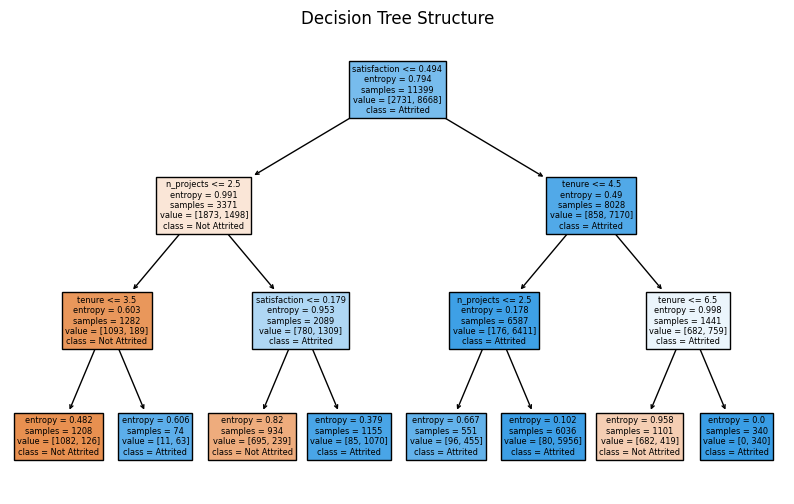

In [23]:
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=["Not Attrited", "Attrited"], filled=True)
plt.title("Decision Tree Structure")
plt.show()

In [24]:
depth = clf.get_depth()
print(f"The depth of the decision tree is: {depth}")

The depth of the decision tree is: 3


In [25]:
feature_importances = clf.feature_importances_
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))
print("Feature importances:")
for feature, importance in sorted_importance_dict.items():
    print(f"{feature}: {importance:.3f}")

Feature importances:
satisfaction: 0.494
tenure: 0.358
n_projects: 0.148


In [26]:
min_leaf_sizes = [1, 5, 10, 20]  # Different minimum leaf sizes to experiment with

for min_leaf in min_leaf_sizes:
    print(f"\nDecision Tree with Minimum Leaf Size = {min_leaf}")
    clf_min_leaf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=min_leaf)
    clf_min_leaf.fit(X_train, y_train)


Decision Tree with Minimum Leaf Size = 1

Decision Tree with Minimum Leaf Size = 5

Decision Tree with Minimum Leaf Size = 10

Decision Tree with Minimum Leaf Size = 20


In [35]:
 # Predict the labels of the testing set
y_pred_min_leaf = clf_min_leaf.predict(X_test)
# Evaluate the model performance using accuracy score
acc_min_leaf = accuracy_score(y_test, y_pred_min_leaf)
print(f"The accuracy of the decision tree with min_samples_leaf={min_leaf} is {acc_min_leaf:.2f}")


The accuracy of the decision tree with min_samples_leaf=20 is 0.96


In [28]:
max_depths = [3, 5, 7, 10]  # Different maximum depths to experiment with

for depth in max_depths:
    print(f"\nDecision Tree with Maximum Depth = {depth}")
    clf_max_depth = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth.fit(X_train, y_train)



Decision Tree with Maximum Depth = 3

Decision Tree with Maximum Depth = 5

Decision Tree with Maximum Depth = 7

Decision Tree with Maximum Depth = 10


In [30]:
y_pred_max_depth = clf_max_depth.predict(X_test)

    # Evaluate the model performance using accuracy score
acc_max_depth = accuracy_score(y_test, y_pred_max_depth)
print(f"The accuracy of the decision tree with max_depth={depth} is {acc_max_depth:.2f}")

The accuracy of the decision tree with max_depth=10 is 0.96


In [31]:
print("Evaluation of Decision Tree with Entropy:")

for depth in max_depths:
    clf_max_depth_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth_entropy.fit(X_train, y_train)

    y_pred_max_depth_entropy = clf_max_depth_entropy.predict(X_test)

    acc_max_depth_entropy = accuracy_score(y_test, y_pred_max_depth_entropy)
    precision_max_depth_entropy = precision_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'
    recall_max_depth_entropy = recall_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'
    f1_max_depth_entropy = f1_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'

    print(f"Metrics for max_depth={depth}:")
    print(f"  Accuracy: {acc_max_depth_entropy:.2f}")
    print(f"  Precision: {precision_max_depth_entropy:.2f}")
    print(f"  Recall: {recall_max_depth_entropy:.2f}")
    print(f"  F1 Score: {f1_max_depth_entropy:.2f}")
    print()

Evaluation of Decision Tree with Entropy:
Metrics for max_depth=3:
  Accuracy: 0.91
  Precision: 0.97
  Recall: 0.91
  F1 Score: 0.94

Metrics for max_depth=5:
  Accuracy: 0.95
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for max_depth=7:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for max_depth=10:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97



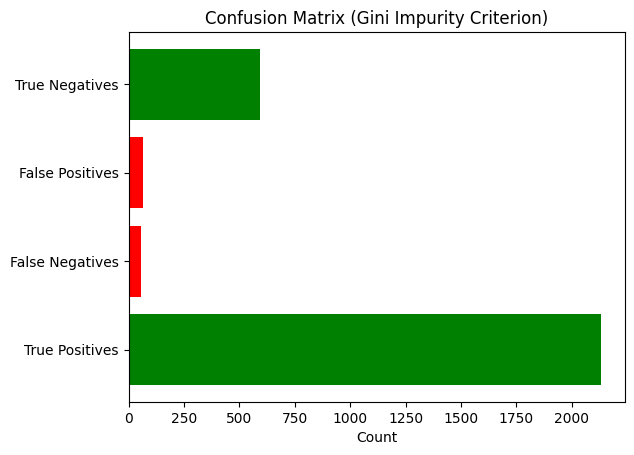

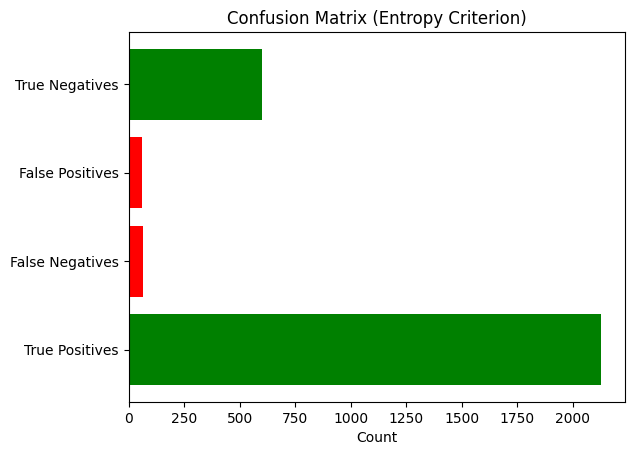

In [44]:
from sklearn.metrics import confusion_matrix

# ... (existing code)

# Function to plot the confusion matrix as a diverging bar chart
def plot_confusion_matrix(y_true, y_pred, criterion_name):
    cm = confusion_matrix(y_true, y_pred)
    categories = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    fig, ax = plt.subplots()

    # Calculate positions for bars on X-axis
    x = np.arange(len(categories))

    ax.barh(x, cm.ravel(), color=['green', 'red', 'red', 'green'])
    ax.set_yticks(x)
    ax.set_yticklabels(categories)
    ax.invert_yaxis()  # Invert y-axis for better visualization
    ax.set_xlabel('Count')
    ax.set_title(f'Confusion Matrix ({criterion_name} Criterion)')

    plt.show()

# Plot confusion matrix for Gini impurity
plot_confusion_matrix(y_test, y_pred_min_leaf, 'Gini Impurity')

# Plot confusion matrix for entropy
plot_confusion_matrix(y_test, y_pred_max_depth_entropy, 'Entropy')

In [37]:
max_depths = [3, 5, 7, 10]  # Different maximum depths to experiment with

for depth in max_depths:
    print(f"\nDecision Tree with Maximum Depth = {depth}")
    clf_max_depth = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth.fit(X_train, y_train)


Decision Tree with Maximum Depth = 3

Decision Tree with Maximum Depth = 5

Decision Tree with Maximum Depth = 7

Decision Tree with Maximum Depth = 10


In [39]:
y_pred_max_depth = clf_max_depth.predict(X_test)

    # Evaluate the model performance using accuracy score
acc_max_depth = accuracy_score(y_test, y_pred_max_depth)
print(f"The accuracy of the decision tree with max_depth={depth} is {acc_max_depth:.2f}")

The accuracy of the decision tree with max_depth=10 is 0.96


In [40]:
print("Evaluation of Decision Tree with Entropy:")

for depth in max_depths:
    clf_max_depth_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth_entropy.fit(X_train, y_train)

    y_pred_max_depth_entropy = clf_max_depth_entropy.predict(X_test)

    acc_max_depth_entropy = accuracy_score(y_test, y_pred_max_depth_entropy)
    precision_max_depth_entropy = precision_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'
    recall_max_depth_entropy = recall_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'
    f1_max_depth_entropy = f1_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'

    print(f"Metrics for max_depth={depth}:")
    print(f"  Accuracy: {acc_max_depth_entropy:.2f}")
    print(f"  Precision: {precision_max_depth_entropy:.2f}")
    print(f"  Recall: {recall_max_depth_entropy:.2f}")
    print(f"  F1 Score: {f1_max_depth_entropy:.2f}")
    print()


Evaluation of Decision Tree with Entropy:
Metrics for max_depth=3:
  Accuracy: 0.91
  Precision: 0.97
  Recall: 0.91
  F1 Score: 0.94

Metrics for max_depth=5:
  Accuracy: 0.95
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for max_depth=7:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for max_depth=10:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97



In [42]:

print("Evaluation of Decision Tree with Gini Impurity:")

best_accuracy_gini = 0
best_min_leaf_gini = None

for min_leaf in min_leaf_sizes:
    clf_min_leaf_gini = DecisionTreeClassifier(criterion="gini", min_samples_leaf=min_leaf)
    clf_min_leaf_gini.fit(X_train, y_train)

    y_pred_min_leaf_gini = clf_min_leaf_gini.predict(X_test)

    acc_min_leaf_gini = accuracy_score(y_test, y_pred_min_leaf_gini)

    if acc_min_leaf_gini > best_accuracy_gini:
        best_accuracy_gini = acc_min_leaf_gini
        best_min_leaf_gini = min_leaf

    print(f"Accuracy for min_samples_leaf={min_leaf}: {acc_min_leaf_gini:.2f}")

print(f"\nBest accuracy with Gini Impurity: {best_accuracy_gini:.2f} (min_samples_leaf={best_min_leaf_gini})")

# Pruning using maximum depth and evaluate metrics for Entropy
print("\nEvaluation of Decision Tree with Entropy:")

best_accuracy_entropy = 0
best_max_depth_entropy = None

for depth in max_depths:
    clf_max_depth_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth_entropy.fit(X_train, y_train)

    y_pred_max_depth_entropy = clf_max_depth_entropy.predict(X_test)

    acc_max_depth_entropy = accuracy_score(y_test, y_pred_max_depth_entropy)

    if acc_max_depth_entropy > best_accuracy_entropy:
        best_accuracy_entropy = acc_max_depth_entropy
        best_max_depth_entropy = depth

    print(f"Accuracy for max_depth={depth}: {acc_max_depth_entropy:.2f}")

print(f"\nBest accuracy with Entropy: {best_accuracy_entropy:.2f} (max_depth={best_max_depth_entropy})")

Evaluation of Decision Tree with Gini Impurity:
Accuracy for min_samples_leaf=1: 0.93
Accuracy for min_samples_leaf=5: 0.95
Accuracy for min_samples_leaf=10: 0.96
Accuracy for min_samples_leaf=20: 0.96

Best accuracy with Gini Impurity: 0.96 (min_samples_leaf=20)

Evaluation of Decision Tree with Entropy:
Accuracy for max_depth=3: 0.91
Accuracy for max_depth=5: 0.95
Accuracy for max_depth=7: 0.96
Accuracy for max_depth=10: 0.96

Best accuracy with Entropy: 0.96 (max_depth=7)
